## **Social Network Analysis**

In [22]:
library(igraph)

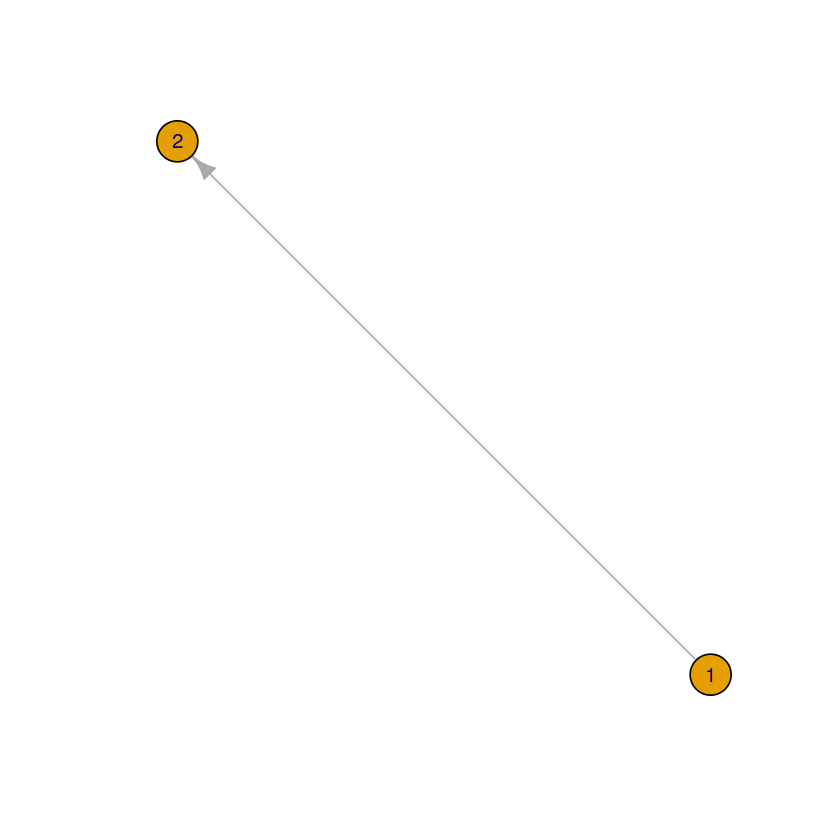

In [3]:
g = graph(c(1,2))
plot(g)

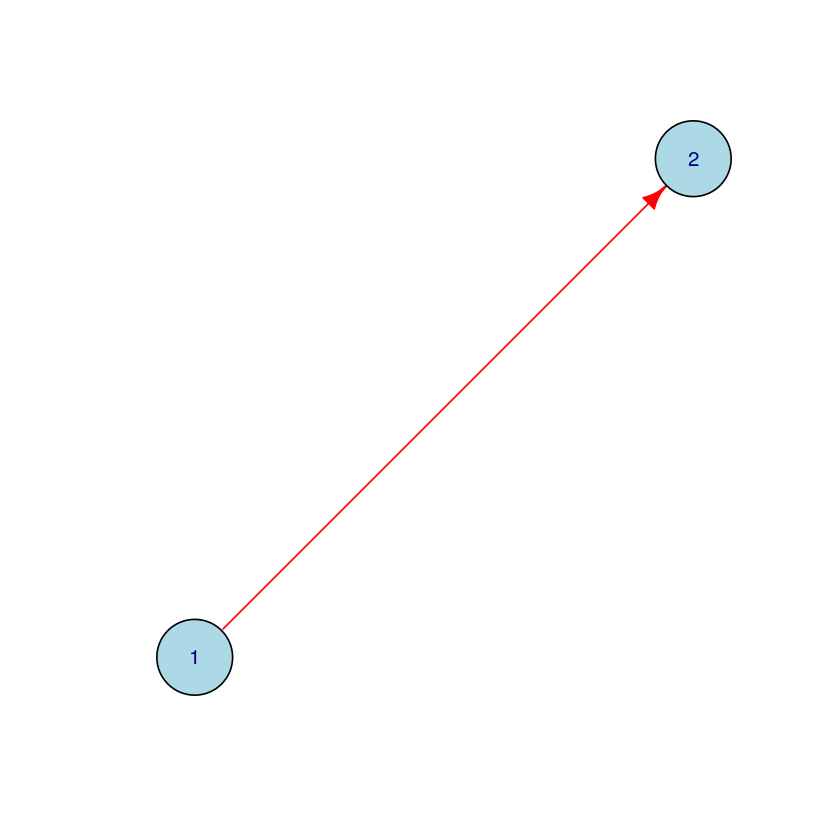

In [10]:
plot(g, vertex.color = 'lightblue', vertex.size = 30, edge.color = 'red')

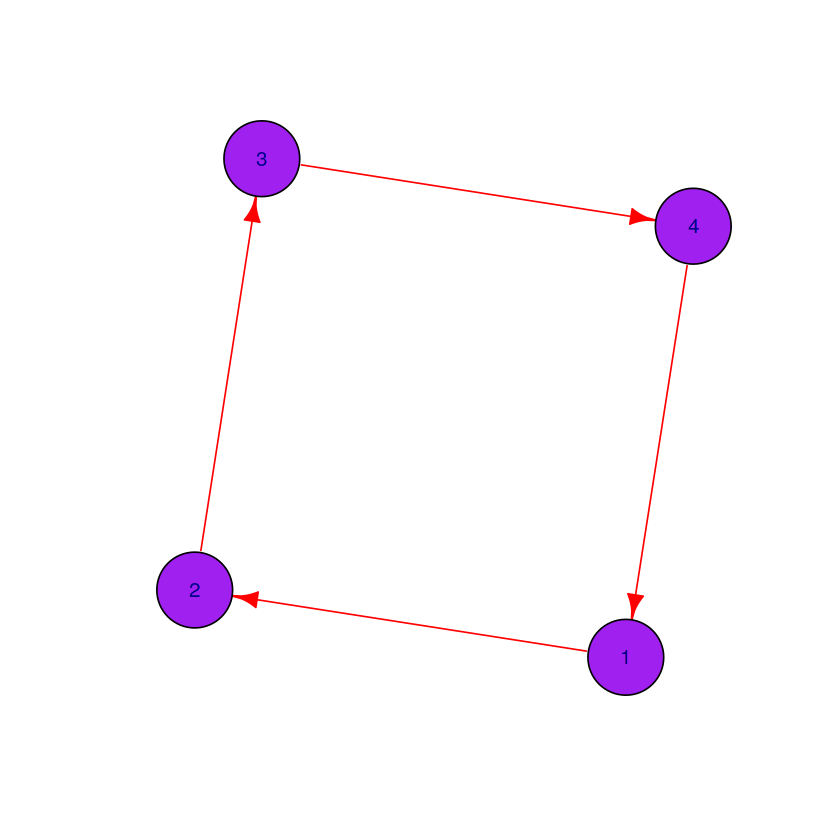

In [29]:
g = graph(c(1,2,2,3,3,4,4,1))
plot(g, vertex.color = 'purple', vertex.size = 30, edge.color = 'red')

In [14]:
g[]

4 x 4 sparse Matrix of class "dgCMatrix"
            
[1,] . 1 . .
[2,] . . 1 .
[3,] . . . 1
[4,] 1 . . .

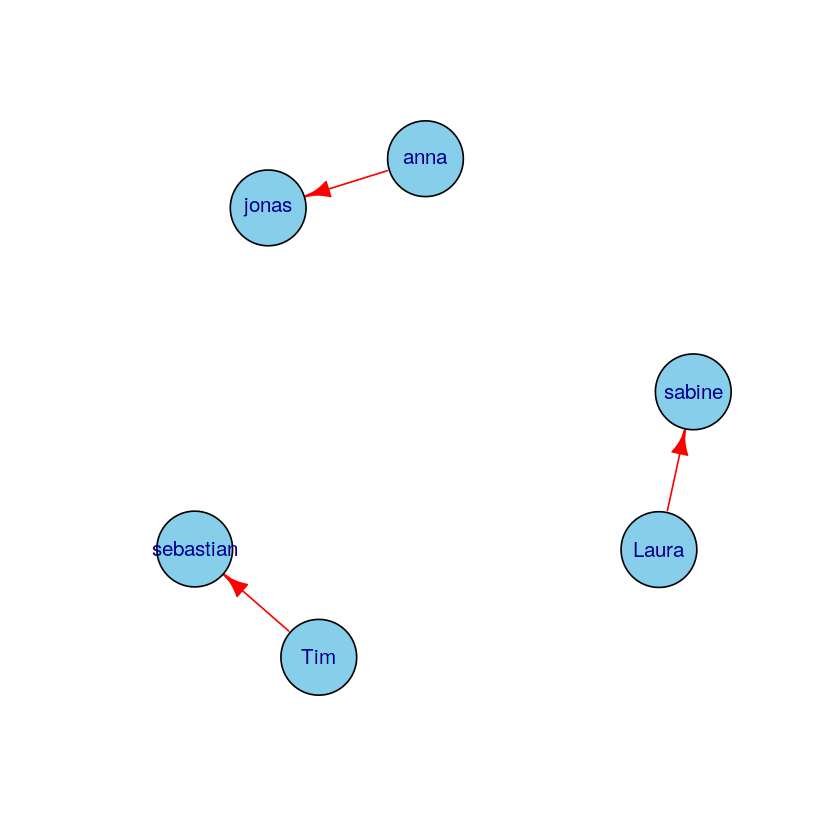

In [24]:
f = graph(c("Tim", "sebastian", "Laura", "sabine", "anna", "jonas"))
plot(f, vertex.color = 'skyblue', vertex.size = 30, edge.color = 'red')

In [25]:
f

IGRAPH 3fd81c0 DN-- 6 3 -- 
+ attr: name (v/c)
+ edges from 3fd81c0 (vertex names):
[1] Tim  ->sebastian Laura->sabine    anna ->jonas    

In [32]:
degree(f)
degree(f, mode = 'in')           # No. of connections to each name. mode in indicates arrow comming in.
degree(f, mode = 'out')

Tim sebastian     Laura    sabine      anna     jonas 
        1         1         1         1         1         1

Tim sebastian     Laura    sabine      anna     jonas 
        0         1         0         1         0         1

Tim sebastian     Laura    sabine      anna     jonas 
        1         0         1         0         1         0

In [35]:
diameter(f, directed = F, weights = NA)

edge_density(f, loops = F)

ecount(f)/(vcount(f)*(vcount(f)-1))        # edge density

[1] 1

[1] 0.1

[1] 0.1

In [40]:
reciprocity (f)

closeness(f, mode = 'all', weights = NA)

betweenness(f)

[1] 0

Warning message in closeness(f, mode = "all", weights = NA):
“At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs”


Tim sebastian     Laura    sabine      anna     jonas 
     0.04      0.04      0.04      0.04      0.04      0.04

Tim sebastian     Laura    sabine      anna     jonas 
        0         0         0         0         0         0

In [56]:
data = read.csv("../input/social-networking-analysis/networkdata.csv", header = T)

In [58]:
y = data.frame(data$first, data$second)

In [61]:
net = graph.data.frame(y, directed = T)
V(net)  # Vertices
E(net)  # Edges

+ 52/52 vertices, named, from 6ba3f31:
 [1] AA AB AF DD CD BA CB CC BC ED AE CA EB BF BB AC DC BD DB CF DF BE EA CE EE
[26] EF FF FD GB GC GD AD KA KF LC DA EC FA FB DE FC FE GA GE KB KC KD KE LB LA
[51] LD LE

+ 290/290 edges from 6ba3f31 (vertex names):
  [1] AA->DD AB->DD AF->BA DD->DA CD->EC DD->CE CD->FA CD->CC BA->AF CB->CA
 [11] CC->CA CD->CA BC->CA DD->DA ED->AD AE->AC AB->BA CD->EC CA->CC EB->CC
 [21] BF->CE BB->CD AC->AE CC->FB DC->BB BD->CF DB->DA DD->DA DB->DD BC->AF
 [31] CF->DE DF->BF CB->CA BE->CA EA->CA CB->CA CB->CA CC->CA CD->CA BC->CA
 [41] BF->CA CE->CA AC->AD BD->BE AE->DF CB->DF AC->DF AA->DD AA->DD AA->DD
 [51] CD->DD AA->DD EE->DD CD->DD DB->AA AA->FC BE->CC EF->FD CF->FE BB->DD
 [61] CD->DD BA->AB CD->EC BE->EE CE->CC CD->CC ED->CC BB->CC BE->CE DD->CE
 [71] AC->CD ED->CD FF->CD AC->CD DD->CD DD->CD AE->GA AE->GA AE->GA AE->GA
 [81] BA->ED BE->ED EB->ED CD->ED FD->EF FD->EF CD->BB BF->BB BC->BB BB->CF
 [91] AE->AC DD->DA BE->CA BE->CA CB->CA CB->CA CC->CA BE->CC BE->CC DB->DD
+ ... omitted several edges

In [67]:
V(net)$label = V(net)$name
V(net)$degree = degree(net)
V(net)$label
V(net)$degree

[1] "AA" "AB" "AF" "DD" "CD" "BA" "CB" "CC" "BC" "ED" "AE" "CA" "EB" "BF" "BB"
[16] "AC" "DC" "BD" "DB" "CF" "DF" "BE" "EA" "CE" "EE" "EF" "FF" "FD" "GB" "GC"
[31] "GD" "AD" "KA" "KF" "LC" "DA" "EC" "FA" "FB" "DE" "FC" "FE" "GA" "GE" "KB"
[46] "KC" "KD" "KE" "LB" "LA" "LD" "LE"

[1] 18  9 23 36 40 26 24 50 21 27 15 62  7 12 23 27  2  4  8 12 23 20  8 10  6
[26]  8  1  8  1  1  1  9  3  3  1  7  3  1  1  2  1  2  5  1  1  1  1  1  1  1
[51]  1  1

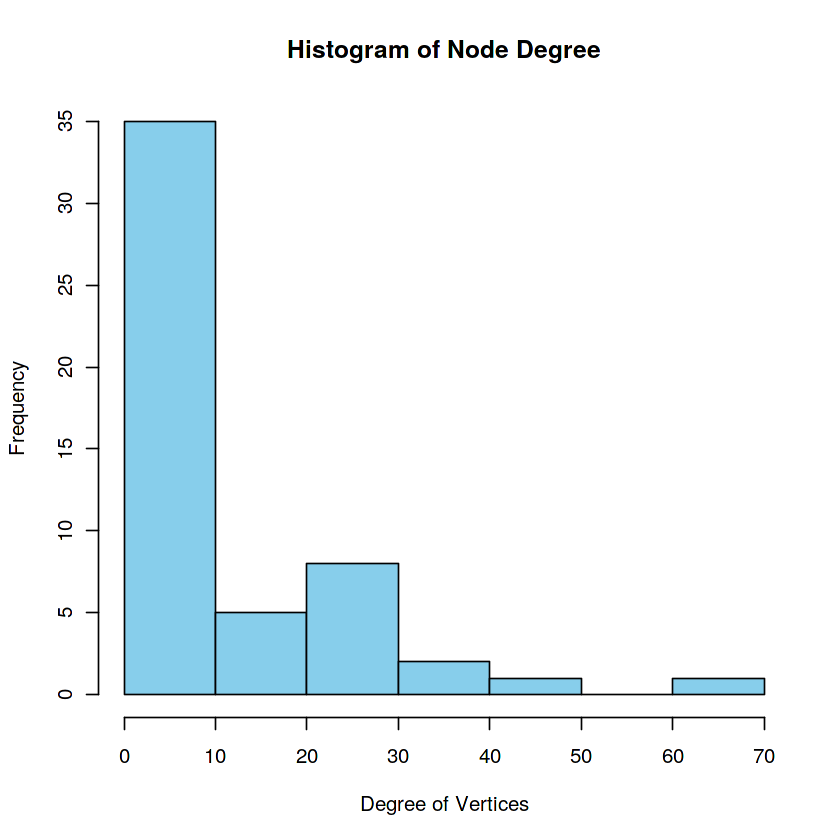

In [70]:
hist(V(net)$degree, col = 'skyblue', main = 'Histogram of Node Degree', 
     ylab = 'Frequency', xlab = 'Degree of Vertices' )

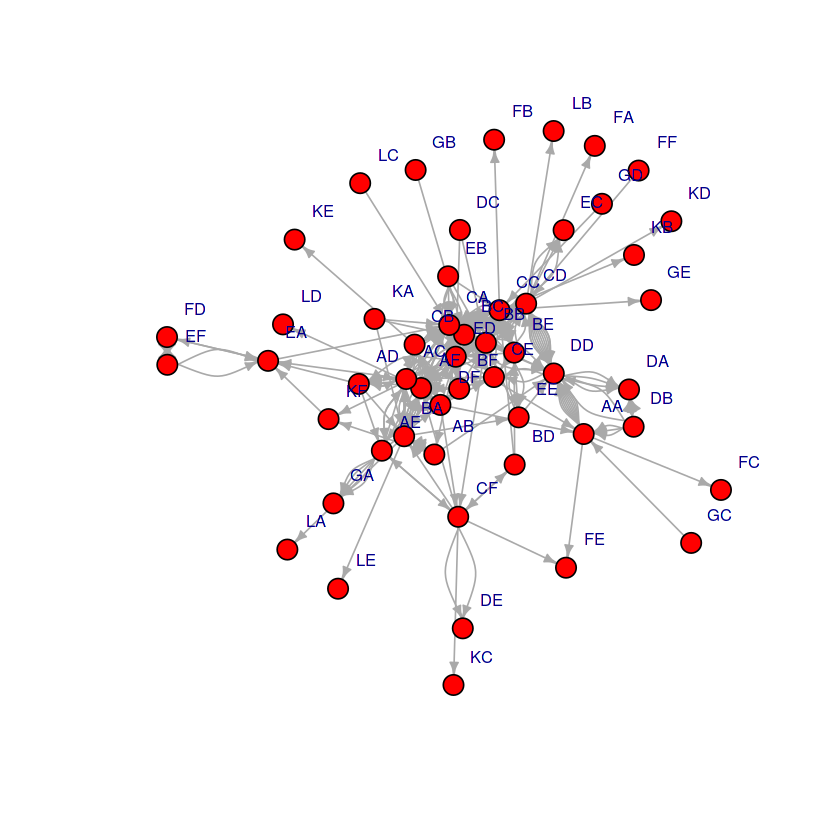

In [77]:
set.seed(222)
plot(net, vertex.color = 'red', vertex.size = 7, vertex.label.dist = 2,
    edge.arrow.size = 0.5, vertex.label.cex = 0.8)

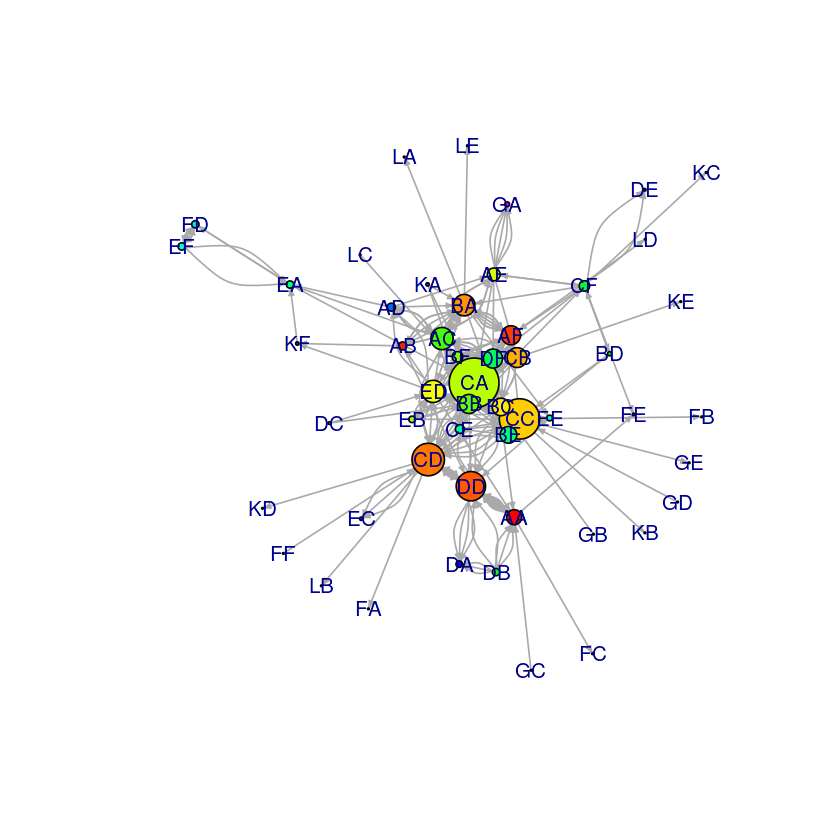

In [86]:
plot(net, vertex.color = rainbow(52), 
    vertex.size = V(net)$degree*0.3, edge.arrow.size = 0.3, 
     layout = layout.fruchterman.reingold)

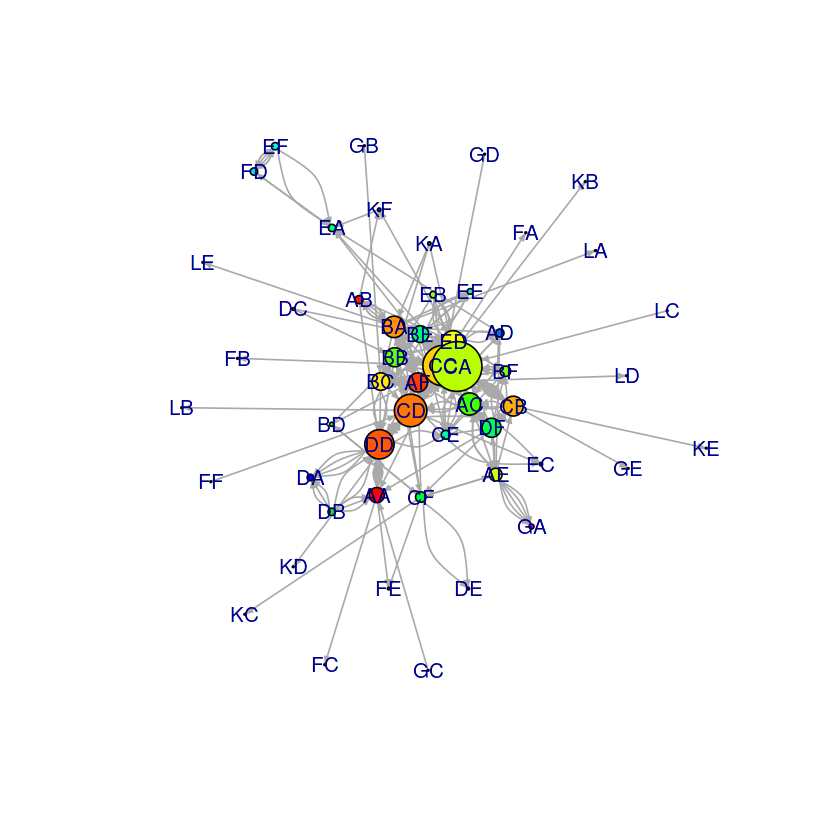

In [87]:
plot(net, vertex.color = rainbow(52), 
    vertex.size = V(net)$degree*0.3, edge.arrow.size = 0.3, 
     layout = layout.graphopt)

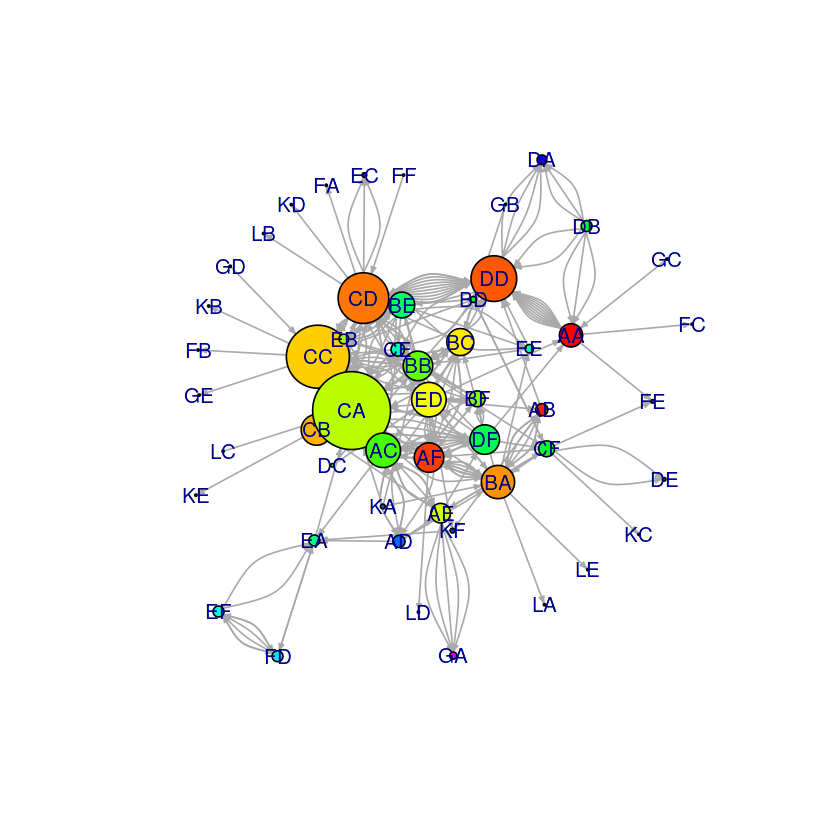

In [88]:
plot(net, vertex.color = rainbow(52), 
    vertex.size = V(net)$degree*0.5, edge.arrow.size = 0.3, 
     layout = layout.kamada.kawai)

In [91]:
hs = hub_score(net)$vector
as = authority.score(net)$vector
hs
as

AA           AB           AF           DD           CD           BA 
8.042807e-02 1.300950e-02 4.731440e-03 1.255496e-02 2.350165e-01 3.239013e-02 
          CB           CC           BC           ED           AE           CA 
7.145888e-01 1.000000e+00 2.321828e-01 4.858357e-02 7.949708e-02 4.494956e-02 
          EB           BF           BB           AC           DC           BD 
1.870058e-01 1.272314e-01 1.150808e-01 2.093518e-01 7.455515e-03 1.305960e-02 
          DB           CF           DF           BE           EA           CE 
1.738176e-02 7.102816e-03 2.505787e-02 2.195271e-01 5.693409e-02 6.319085e-02 
          EE           EF           FF           FD           GB           GC 
1.273824e-02 1.119098e-03 4.485458e-03 4.563724e-04 3.594258e-04 2.507046e-04 
          GD           AD           KA           KF           LC           DA 
6.374463e-03 9.643170e-03 6.276463e-02 4.418478e-04 5.681639e-02 2.404852e-17 
          EC           FA           FB           DE           FC           FE 
7.039433e-18 6.158069e-18 6.158069e-18 1.231614e-17 6.158069e-18 1.231614e-17 
          GA           GE           KB           KC           KD           KE 
1.173239e-17 6.158069e-18 6.158069e-18 6.158069e-18 6.158069e-18 6.158069e-18 
          LB           LA           LD           LE 
7.002841e-18 7.002841e-18 7.002841e-18 7.002841e-18

AA           AB           AF           DD           CD           BA 
4.412541e-03 3.968841e-03 8.375004e-02 1.409698e-01 7.894656e-02 2.146204e-02 
          CB           CC           BC           ED           AE           CA 
3.660444e-03 1.121941e-01 6.326094e-03 4.799095e-02 1.524499e-02 1.000000e+00 
          EB           BF           BB           AC           DC           BD 
4.631391e-17 6.072030e-03 8.323026e-02 6.262068e-02 1.543926e-17 2.486679e-04 
          DB           CF           DF           BE           EA           CE 
6.175703e-17 8.146610e-03 1.925650e-01 1.095155e-01 7.776767e-03 2.437300e-02 
          EE           EF           FF           FD           GB           GC 
2.419075e-02 6.390996e-05 7.719628e-18 2.071608e-03 7.719628e-18 7.719628e-18 
          GD           AD           KA           KF           LC           DA 
7.719628e-18 1.806051e-02 2.161419e-17 2.156359e-03 7.719628e-18 3.583779e-03 
          EC           FA           FB           DE           FC           FE 
2.468362e-02 8.227873e-03 3.500976e-02 4.973358e-04 2.815768e-03 3.064436e-03 
          GA           GE           KB           KC           KD           KE 
1.391587e-02 3.500976e-02 3.500976e-02 2.486679e-04 8.227873e-03 2.501759e-02 
          LB           LA           LD           LE 
8.227873e-03 1.133971e-03 1.656466e-04 1.133971e-03

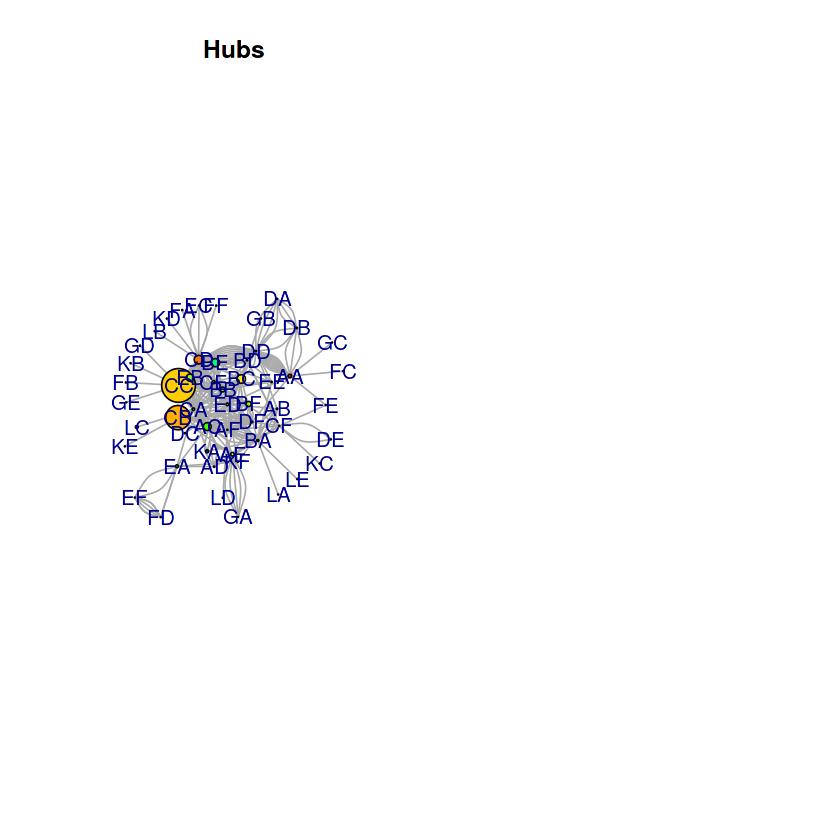

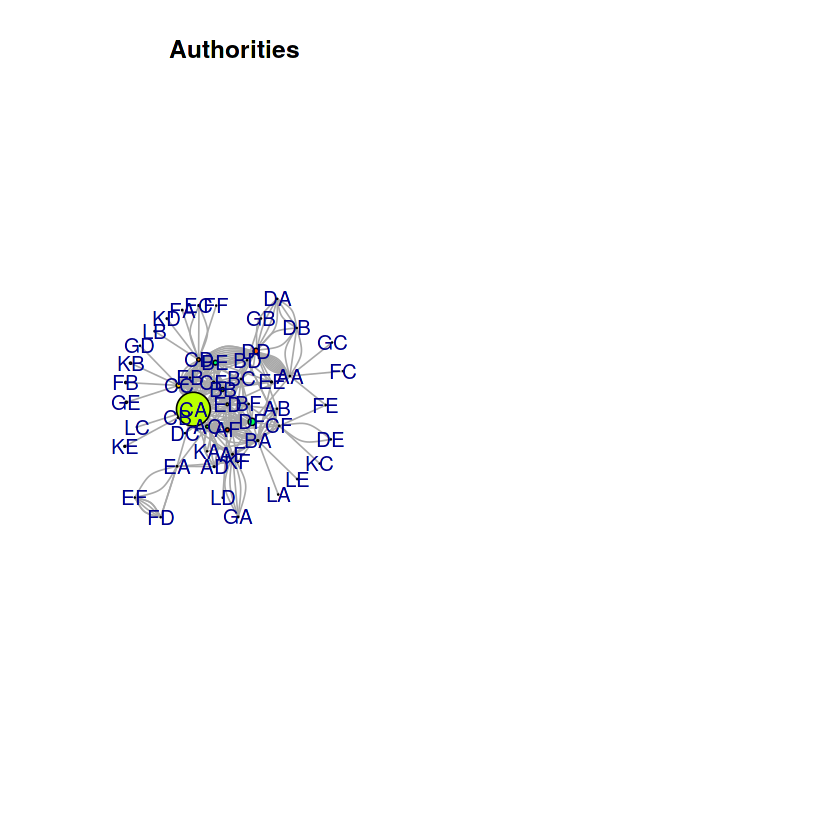

In [97]:
par(mfrow = c(1,2))
set.seed(123)
plot(net, vertex.size = hs*30, main = 'Hubs', vertex.color = rainbow(52),
    edge.arrow.size = 0.1, layout = layout.kamada.kawai)

par(mfrow = c(1,2))
set.seed(123)
plot(net, vertex.size = as*30, main = 'Authorities', vertex.color = rainbow(52),
    edge.arrow.size = 0.1, layout = layout.kamada.kawai)

In [ ]:
net = graph.data.frame(y, directed = F)
cnet = cluster_edge_betweenness(net)
plot(cnet, net, vertex.size = 10, vetex.label.cex = 0.8)